In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Wczytanie obrazka
image = cv2.imread('../satellite-images/Namibia.jpg')

In [ ]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

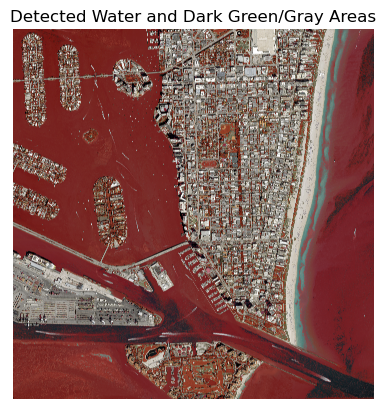

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Wczytaj obraz
image_path = '../satellite-images/Miami.jpg'
image = cv2.imread(image_path)

# Sprawdź, czy obraz został poprawnie wczytany
if image is None:
    print("Błąd wczytywania obrazu.")
else:
    # Konwertuj obraz na przestrzeń barw HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Definiuj zakresy kolorów dla wody (niebieskiego) w przestrzeni barw HSV
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([140, 255, 255])

    # Definiuj zakresy kolorów dla ciemnozielonego/ciemnoszarego w przestrzeni barw HSV
    lower_dark_green_gray = np.array([40, 30, 30])
    upper_dark_green_gray = np.array([90, 255, 120])

    # Stwórz maski dla wykrywania wody oraz ciemnozielonych i ciemnoszarych obszarów
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_dark_green_gray = cv2.inRange(hsv, lower_dark_green_gray, upper_dark_green_gray)

    # Połącz maski
    mask = cv2.bitwise_or(mask_blue, mask_dark_green_gray)

    # Stwórz czerwoną przezroczystą maskę
    overlay = image.copy()
    output = image.copy()
    overlay[mask > 0] = (0, 0, 255)  # kolor czerwony w BGR

    # Połącz obraz z maską z przezroczystością
    alpha = 0.4  # przezroczystość
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    # Konwertuj obraz z BGR na RGB dla poprawnego wyświetlania w Matplotlib
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    # Wyświetl obraz za pomocą Matplotlib
    plt.imshow(output_rgb)
    plt.title('Detected Water and Dark Green/Gray Areas')
    plt.axis('off')
    plt.show()
